# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [1]:
#Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [3]:
spaceship = spaceship.dropna()

In [4]:
spaceship['Cabin'] = spaceship['Cabin'].str[0]
spaceship['Cabin'].value_counts()

Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

<Axes: xlabel='Transported'>

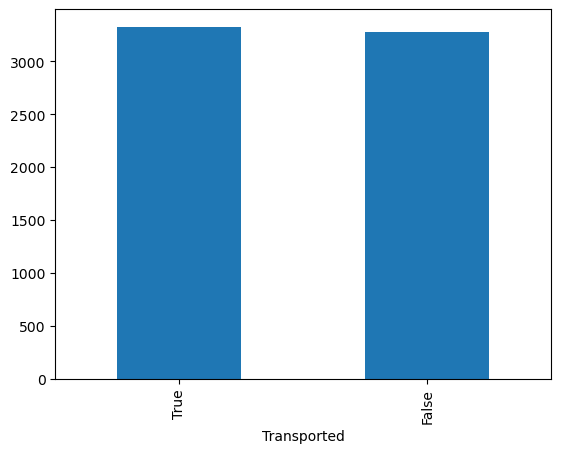

In [5]:
spaceship['Transported'].value_counts().plot(kind='bar')

In [6]:
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])
cat_columns = spaceship.select_dtypes(include=object).columns

spaceship = pd.get_dummies(spaceship, columns=cat_columns, drop_first=True)
spaceship.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,False,False,False,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False


In [7]:
scaler = StandardScaler()

X = spaceship.drop(columns='Transported')
y = spaceship['Transported']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [9]:
# Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=0)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

- Evaluate your model

In [10]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy (baseline):", acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy (baseline): 0.7904689863842662
[[531 130]
 [147 514]]
              precision    recall  f1-score   support

       False       0.78      0.80      0.79       661
        True       0.80      0.78      0.79       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



**Grid/Random Search**

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [13]:
grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 10, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]}

- Run Grid Search

In [14]:
model = GridSearchCV(
    estimator=rf,
    param_grid=grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1)

model.fit(X_train_scaled, y_train)

,estimator,RandomForestC...andom_state=0)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


- Evaluate your model

In [15]:
best_rf = model.best_estimator_

y_pred = best_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7829046898638427
[[511 150]
 [137 524]]
              precision    recall  f1-score   support

       False       0.79      0.77      0.78       661
        True       0.78      0.79      0.79       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



En este lab se ha aplicado hyperparameter tuning sobre el modelo Random Forest, que había sido el que mejor rendimiento mostró en el lab anterior.
Tras realizar Grid Search con validación cruzada, el rendimiento obtenido es similar, e incluso ligeramente inferior, al del modelo baseline.

En este caso, los resultados indican que el Random Forest con parámetros por defecto ya ofrecía un buen equilibrio, y que el tuning no aporta una mejora significativa en la capacidad de generalización del modelo.